In [1]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
import ast
from sklearn.decomposition import PCA
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import rcParams

TRAIN = "Train"
EVAL = "Eval"

In [2]:
def embeddings_pca(embeddings_df, n_components=3):
    pca = PCA(n_components=n_components)
    pca.fit(embeddings_df)
    print('Components:', pca.components_)
    print('Explained variance', pca.explained_variance_)
    print('Explained variance ratio', pca.explained_variance_ratio_)
    embeddings = pca.transform(embeddings_df)
    return embeddings

In [21]:
def plot_corr(embeddings, tasks, experiment_name):
    tasks_embeddings = np.concatenate((embeddings, tasks), axis=1)
    columns = ["pca_{}".format(i) for i in range(embeddings.shape[1])]
    columns += ["task_{}".format(i) for i in range(tasks.shape[1])]
    tasks_embeddings_df = pd.DataFrame(data=tasks_embeddings, columns=columns)
    ax = sn.heatmap(tasks_embeddings_df.corr(), annot=True)
    ax.set_ylim(0, 6)
    plt.title(experiment_name)
    plt.savefig('images/{}_corr.png'.format(experiment_name))
    plt.show()
    plt.clf()

In [4]:
def plott(embeddings, labels, tasks, title='', task_param='velocity', n_components=3):
    stages = np.array([
        TRAIN if label['stage'] == 'train' else EVAL 
        for label in labels
    ])

    if len(tasks.shape) > 1:
        tasks = np.array([
            float("{0:.2f}".format(
                np.linalg.norm(np.array(task) - np.array([0, 0.85, 0.175]))
            ))
            for task in tasks
        ])

    if n_components == 3:
        fig = px.scatter_3d(embeddings, x=0, y=1, z=2, color=tasks_v, symbol=stages)
    else:
        fig = px.scatter(embeddings, x=0, y=1, color=tasks, symbol=stages)

    fig.update_layout(
        title=title,
        legend=dict(x=-.1, y=-.1)
    )
    fig.show()

In [5]:
def plott2d(embeddings, labels, tasks, title='', task_param='velocity', n_components=3, task_ax=0, pca_ax=0):
    stages = np.array([
        TRAIN if label['stage'] == 'train' else EVAL 
        for label in labels
    ])
    if len(tasks.shape) > 1:
        tasks_v = np.array([
            float("{0:.2f}".format(
                task[task_ax]
            ))
            for task in tasks
        ])

    fig = px.scatter(embeddings, x=pca_ax, y=[0]*len(embeddings), color=tasks_v, symbol=stages)

    fig.update_layout(
        title='{} - Color: Task[{}], X: PCA[{}]'.format(title, task_ax, pca_ax),
        legend=dict(x=-.1, y=-.1)
    )
    #fig.show()
    fig.write_image("images/{}_task{}_pca{}.png".format(title, task_ax, pca_ax))

In [13]:
experiments = []

for dirname, _, _ in os.walk('output'):
    if 'embeddings' in dirname.split('/')[-1]:
        experiments.append(dirname)

experiments.sort()
for i, experiment in enumerate(experiments):
    print(i, experiment)

0 output/cheetah-vel/2020_02_16_00_49_55-intobs/embeddings
1 output/cheetah-vel/2020_02_17_18_09_55-intctx/embeddings
2 output/cheetah-vel/2020_03_03_16_20_26-baseline/embeddings
3 output/cheetah-vel/2020_03_04_17_23_41-baseline/embeddings
4 output/cheetah-vel/2020_03_05_23_41_01-intctx/embeddings
5 output/cheetah-vel/2020_03_06_13_23_33-ctxgrads/embeddings
6 output/cheetah-vel/2020_03_07_23_12_39-intctx/embeddings
7 output/cheetah-vel/2020_03_17_00_33_59-intctx/embeddings
8 output/cheetah-vel/2020_03_26_04_30_37-l2-01/embeddings
9 output/cheetah-vel/2020_03_26_04_34_42-dropout/embeddings
10 output/cheetah-vel/2020_03_27_00_51_58-l2/embeddings
11 output/reach-ml1/2020_04_09_01_49_41-baseline-3adapt/embeddings
12 output/reach-ml1/2020_04_15_22_29_42-baseline/embeddings
13 output/reach-ml1/2020_04_18_23_23_57-baseline-ood/embeddings
14 output/reach-ml1/2020_04_18_23_25_34-rwscale/embeddings
15 output/reach-ml1/2020_04_21_15_12_49-l2-ood/embeddings
16 output/reach-ml1/2020_04_21_15_13_40-

In [15]:
results = [
    #(0, 'Int. Obs 1', 'velocity'),
    #('Int. Ctx', 'output/cheetah-vel/2020_02_17_18_09_55-intctx/embeddings', 'velocity', 2, '00002'),
    #('PEARL', 'output/cheetah-vel/2020_03_03_16_20_26-baseline/embeddings', 'velocity', 2, '00002'),
    #(3, 'PEARL 2', 'velocity'),
    #(4, 'Int. Ctx 2', 'velocity'),
    #(5, 'Ctx Only Grads', 'velocity'),
    #(6, 'Int. Ctx 3', 'velocity'),
    #(7, 'Int. Ctx 4', 'velocity'),
    #(8, 'L2 0.1', 'velocity'),
    #(9, 'Dropout', 'velocity'),    
    #('L2', 'output/cheetah-vel/2020_03_27_00_51_58-l2/embeddings', 'velocity', 2, '00002'),
    #(11, 'L2 0.01 2', 'velocity'),
    #(12, 'PEARL 3 (Small)', 'velocity'),
    #(3, 'Reach Normalized', 'goal')
    #('PEARL', 'output/reach-ml1/2020_04_15_22_29_42-baseline/embeddings', 'goal_pos', '00010'),
    #(13, 'PEARL OOD', 'goal_pos', '00010'),
    #(14, 'Scale', 'goal_pos', '00010'),
    #(15, 'L2 0.01', 'goal_pos', '00010'),
    #(16, 'Int Obs OOD', 'goal_pos', '00010'),
    #(17, 'Int Ctx OOD', 'goal_pos', '00010'), # curiosity (ctx) out of dist on reach
    #('Int Ctx', 'output/reach-ml1/2020_04_23_13_48_31-intctx/embeddings', 'goal_pos', '00010'),
    #('L2 0.01', 'output/reach-ml1/2020_04_25_13_48_34-l2/embeddings', 'goal_pos', '00010'),
    #(20, 'L2 0.01 OOD', 'goal_pos', '00010'), # L2 reg on encoder out of dist on reach
    ('Baseline Long', 'output/reach-ml1/2020_05_21_12_06_15-baselinelong/embeddings', 'goal_pos', 3, '00010'),
    ('L2 Long', 'output/reach-ml1/2020_05_21_12_07_10-l2long/embeddings', 'goal_pos', 3, '00010'),
    #('Latent 3', 'output/reach-ml1/2020_05_29_15_22_28/embeddings', 'goal_pos', 3, '00010'),
    #('Latent 3', 'output/reach-ml1/2020_05_29_15_22_28/embeddings', 'goal_pos', 3, '00010'),
]

Components: [[ 0.03461088  0.48102611 -0.04201997 -0.04188355  0.87401148]
 [ 0.06180605  0.85536828  0.06328812  0.22216542 -0.45952394]
 [-0.2844757  -0.14383424 -0.10878323  0.93256691  0.12988631]]
Explained variance [7.59409381 2.54796253 1.53029662]
Explained variance ratio [0.61357608 0.20586642 0.12364259]


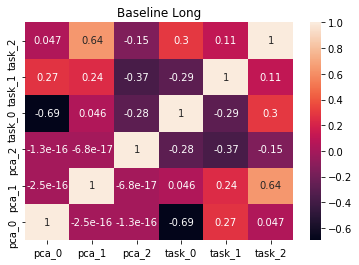

Components: [[-0.01569768 -0.23394431 -0.70241524 -0.60586526  0.29079849]
 [-0.25779718 -0.3498728  -0.55218337  0.6771752  -0.21830464]
 [-0.79825221 -0.29948065  0.33306642 -0.05859136  0.39842008]]
Explained variance [645.28244668   3.44335757   0.73740764]
Explained variance ratio [0.99236878 0.00529548 0.00113405]


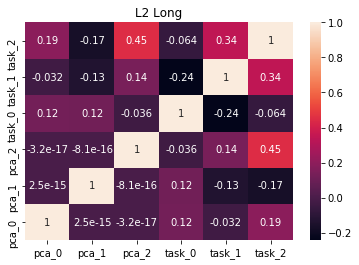

<Figure size 432x288 with 0 Axes>

In [22]:
for experiment_name, experiment_path, task_param, n_components, adapt_index in results:
    path = os.path.join(experiment_path, adapt_index)
    embeddings_df = pd.read_csv(os.path.join(path, 'default/tensors.tsv'), sep='\t', header=None)
    labels_df = pd.read_csv(os.path.join(path, 'default/metadata.tsv'), sep='\t', header=None)

    embeddings = embeddings_pca(embeddings_df, n_components=n_components)
    labels = [ast.literal_eval(label.replace("array(", "").replace(", dtype=float32)", "")) for label in labels_df[0].array]
    tasks = np.array([
        [label[task_param]] if type(label[task_param]) is float else label[task_param]
        for label in labels
    ])
    plot_corr(embeddings, tasks, experiment_name)
    continue
    plott(embeddings, labels, tasks, title=experiment_name, task_param=task_param, n_components=n_components)

    for task_ax in range(tasks.shape[1]):
        for pca_ax in range(embeddings.shape[1]):
            plott2d(embeddings, labels, tasks, title=experiment_name, task_param=task_param, task_ax=task_ax, pca_ax=pca_ax)